# ECE 285 Assignment 1: Logistic Regression

For this part of assignment, you are tasked to implement a logistic regression algorithm for multiclass classification and test it on the CIFAR10 dataset.

You sould run the whole notebook and answer the questions in the notebook.

TO SUBMIT: PDF of this notebook with all the required outputs and answers.


In [1]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from ece285.utils.data_processing import get_cifar10_data

# Use a subset of CIFAR10 for KNN assignments
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)


dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


# Logistic Regression for multi-class classification


A Logistic Regression Algorithm has 3 hyperparameters that you can experiment with:

- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, and later you are asked to experiment with different values. We recommend looking at the graphs and observing how the performance of the classifier changes with different learning rate.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according the linear classifier update rule for each sample in the training set. We evaluate our models after every 10 epochs and save the accuracies, which are later used to plot the training, validation and test VS epoch curves.
- **Weight Decay** - Regularization can be used to constrain the weights of the classifier and prevent their values from blowing up. Regularization helps in combatting overfitting. You will be using the 'weight_decay' term to introduce regularization in the classifier.

The only way how a Logistic Regression based classification algorithm is different from a Linear Regression algorithm is that in the former we additionally pass the classifier outputs into a sigmoid function which squashes the output in the (0,1) range. Essentially these values then represent the probabilities of that sample belonging to class particular classes


### Implementation (40%)

You need to implement the Linear Regression method in `algorithms/logistic_regression.py`. You need to fill in the sigmoid function, training function as well as the prediction function.


In [2]:
# Import the algorithm implementation (TODO: Complete the Logistic Regression in algorithms/logistic_regression.py)
from ece285.algorithms import Logistic
from ece285.utils.evaluation import get_classification_accuracy

num_classes = 10  # Cifar10 dataset has 10 different classes

# Initialize hyper-parameters
learning_rate = 0.01  # You will be later asked to experiment with different learning rates and report results
num_epochs_total = 1000  # Total number of epochs to train the classifier
epochs_per_evaluation = 10  # Epochs per step of evaluation; We will evaluate our model regularly during training
N, D = dataset[
    "x_train"
].shape  # Get training data shape, N: Number of examples, D:Dimensionality of the data
weight_decay = 0.00002

x_train = dataset["x_train"].copy()
y_train = dataset["y_train"].copy()
x_val = dataset["x_val"].copy()
y_val = dataset["y_val"].copy()
x_test = dataset["x_test"].copy()
y_test = dataset["y_test"].copy()

# Insert additional scalar term 1 in the samples to account for the bias as discussed in class
x_train = np.insert(x_train, D, values=1, axis=1)
x_val = np.insert(x_val, D, values=1, axis=1)
x_test = np.insert(x_test, D, values=1, axis=1)

In [3]:
# Training and evaluation function -> Outputs accuracy data
def train(learning_rate_, weight_decay_):
    # Create a linear regression object
    logistic_regression = Logistic(
        num_classes, learning_rate_, epochs_per_evaluation, weight_decay_
    )

    # Randomly initialize the weights and biases
    weights = np.random.randn(num_classes, D + 1) * 0.0001

    train_accuracies, val_accuracies, test_accuracies = [], [], []

    # Train the classifier
    for _ in tqdm(range(int(num_epochs_total / epochs_per_evaluation))):
        # Train the classifier on the training data
        weights = logistic_regression.train(x_train, y_train, weights)

        # Evaluate the trained classifier on the training dataset
        y_pred_train = logistic_regression.predict(x_train)
        train_accuracies.append(get_classification_accuracy(y_pred_train, y_train))

        # Evaluate the trained classifier on the validation dataset
        y_pred_val = logistic_regression.predict(x_val)
        val_accuracies.append(get_classification_accuracy(y_pred_val, y_val))

        # Evaluate the trained classifier on the test dataset
        y_pred_test = logistic_regression.predict(x_test)
        test_accuracies.append(get_classification_accuracy(y_pred_test, y_test))

    return train_accuracies, val_accuracies, test_accuracies, weights


In [4]:
import matplotlib.pyplot as plt


def plot_accuracies(train_acc, val_acc, test_acc):
    # Plot Accuracies vs Epochs graph for all the three
    epochs = np.arange(0, int(num_epochs_total / epochs_per_evaluation))
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch/10")
    plt.plot(epochs, train_acc, epochs, val_acc, epochs, test_acc)
    plt.legend(["Training", "Validation", "Testing"])
    plt.show()


In [5]:
# Run training and plotting for default parameter values as mentioned above
t_ac, v_ac, te_ac, weights = train(learning_rate, weight_decay)


100%|█████████████████████████████████████████| 100/100 [08:07<00:00,  4.87s/it]


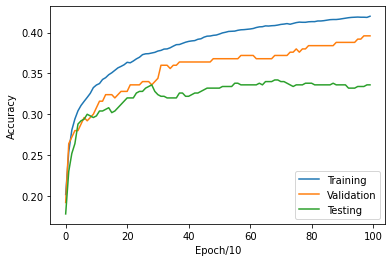

In [6]:
plot_accuracies(t_ac, v_ac, te_ac)


### Try different learning rates and plot graphs for all (20%)


100%|█████████████████████████████████████████| 100/100 [08:09<00:00,  4.89s/it]


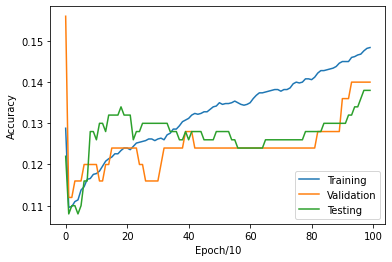

100%|█████████████████████████████████████████| 100/100 [08:11<00:00,  4.91s/it]


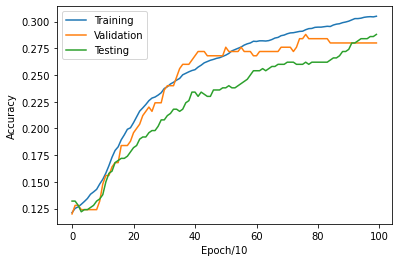

100%|█████████████████████████████████████████| 100/100 [08:18<00:00,  4.99s/it]


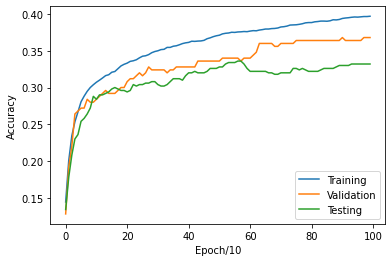

100%|█████████████████████████████████████████| 100/100 [22:48<00:00, 13.68s/it]


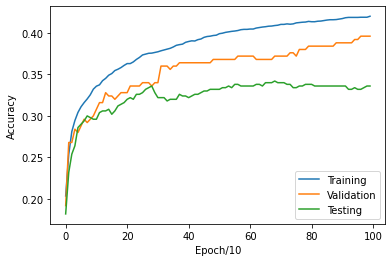

100%|█████████████████████████████████████████| 100/100 [14:51<00:00,  8.91s/it]


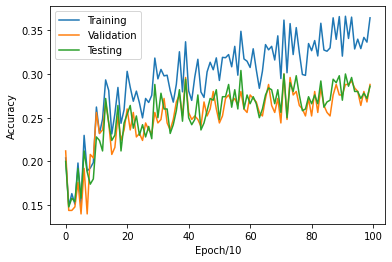

100%|█████████████████████████████████████████| 100/100 [14:16<00:00,  8.57s/it]


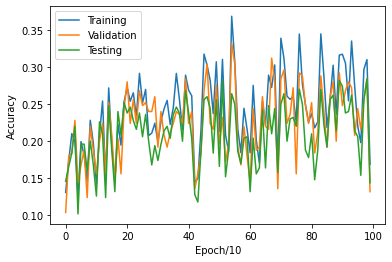

In [7]:
# TODO
# Repeat the above training and evaluation steps for the following learning rates and plot graphs
# You need to submit all 5 graphs along with this notebook pdf
epochs_per_evaluation = 10
learning_rates = [5e-5, 5e-4, 0.005, 0.01, 0.05, 0.1]
weight_decay = 0.0  # No regularization for now

# FEEL FREE TO EXPERIMENT WITH OTHER VALUES. REPORT OTHER VALUES IF THEY ACHIEVE A BETTER PERFORMANCE

# for lr in learning_rates: Train the classifier and plot data
# Step 1. train_accu, val_accu, test_accu = train(lr, weight_decay)
# Step 2. plot_accuracies(train_accu, val_accu, test_accu)

acc_lr_dict = {}
for lr in learning_rates: 
    t_ac, v_ac, te_ac, weights = train(lr, weight_decay)
    acc_lr_dict.update({lr : [t_ac, v_ac, te_ac, weights]})
    plot_accuracies(t_ac, v_ac, te_ac)
    
#Best learning rate 

accuracies = [acc_lr_dict[lr][1][-1] for lr in learning_rates]
best_lr = learning_rates[np.argmax(accuracies)]


In [8]:
best_lr

0.01

In [9]:
accuracies

[0.14, 0.28, 0.368, 0.396, 0.288, 0.132]

#### Inline Question 1.

Which one of these learning rates (best_lr) would you pick to train your model? Please Explain why.

#### Your Answer:
From the above graphs, using the learning rate of 0.01 seems to be the best because it is able to reach an accuracy of 39.6% on the validation set which is better than the rest of the learning rates. 

### Regularization: Try different weight decay and plots graphs for all (20%)


100%|█████████████████████████████████████████| 100/100 [12:36<00:00,  7.56s/it]


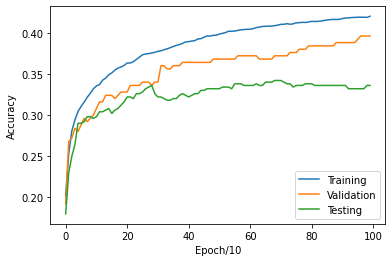

100%|█████████████████████████████████████████| 100/100 [08:33<00:00,  5.14s/it]


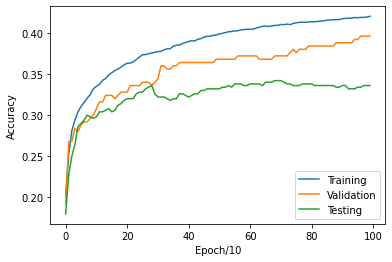

100%|█████████████████████████████████████████| 100/100 [08:26<00:00,  5.07s/it]


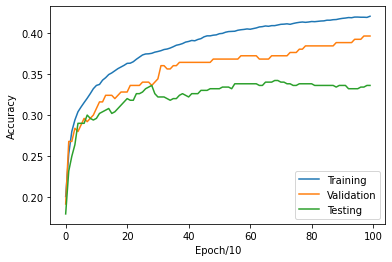

100%|█████████████████████████████████████████| 100/100 [08:59<00:00,  5.40s/it]


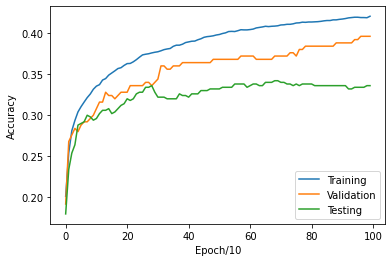

100%|█████████████████████████████████████████| 100/100 [08:35<00:00,  5.15s/it]


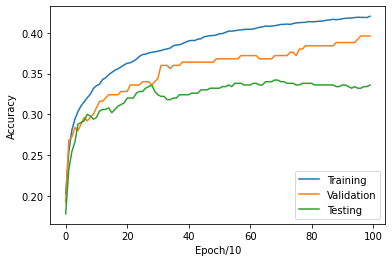

100%|█████████████████████████████████████████| 100/100 [09:53<00:00,  5.93s/it]


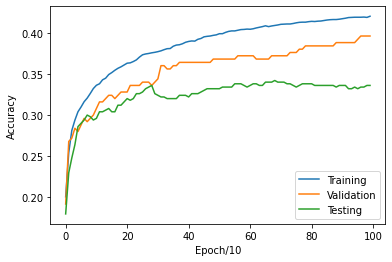

In [10]:
# Initialize a non-zero weight_decay (Regulzarization constant) term and repeat the training and evaluation
# Use the best learning rate as obtained from the above excercise, best_lr
weight_decays = [0.0, 0.00005, 0.00003, 0.00002, 0.00001, 0.000005]
# weight_decays = [0, 5e-1, 5e-2, 5e-3, 5e-4, 5e-5, 5e-6]

# FEEL FREE TO EXPERIMENT WITH OTHER VALUES. REPORT OTHER VALUES IF THEY ACHIEVE A BETTER PERFORMANCE

# for weight_decay in weight_decays: Train the classifier and plot data
# Step 1. train_accu, val_accu, test_accu = train(best_lr, weight_decay)
# Step 2. plot_accuracies(train_accu, val_accu, test_accu)
acc_reg_dict = {}
for w in weight_decays: 
    t_ac, v_ac, te_ac, weights = train(best_lr, weight_decay)
    plot_accuracies(t_ac, v_ac, te_ac)
    acc_reg_dict.update({w : [t_ac, v_ac, te_ac, weights]})

accuracies_reg = [acc_reg_dict[w][1][-1] for w in weight_decays]
best_w = weight_decays[np.argmax(accuracies_reg)]
    

In [12]:
accuracies_reg

[0.396, 0.396, 0.396, 0.396, 0.396, 0.396]

In [13]:
best_w

0.0

100%|█████████████████████████████████████████| 100/100 [06:23<00:00,  3.83s/it]


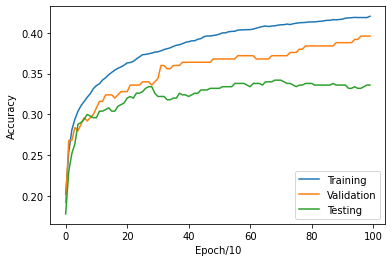

100%|█████████████████████████████████████████| 100/100 [06:53<00:00,  4.14s/it]


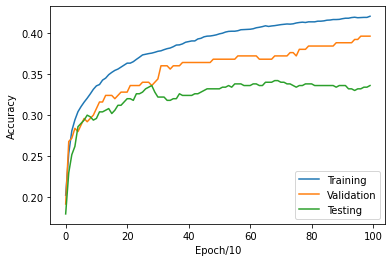

100%|█████████████████████████████████████████| 100/100 [07:10<00:00,  4.30s/it]


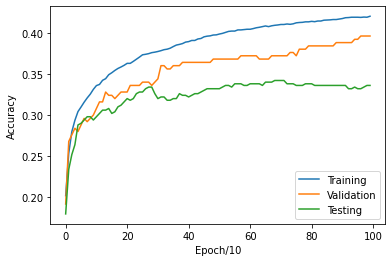

100%|█████████████████████████████████████████| 100/100 [07:13<00:00,  4.33s/it]


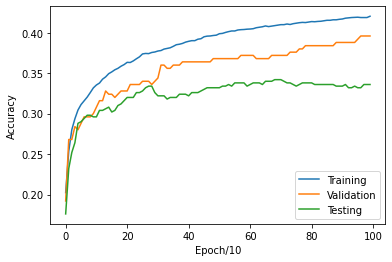

100%|█████████████████████████████████████████| 100/100 [06:57<00:00,  4.18s/it]


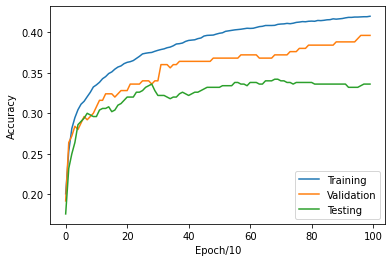

In [16]:
# Initialize a non-zero weight_decay (Regulzarization constant) term and repeat the training and evaluation
# Use the best learning rate as obtained from the above excercise, best_lr
weight_decays = [0.0,1e-2, 1e-4, 1e-6, 1e-8]
# weight_decays = [0, 5e-1, 5e-2, 5e-3, 5e-4, 5e-5, 5e-6]

# FEEL FREE TO EXPERIMENT WITH OTHER VALUES. REPORT OTHER VALUES IF THEY ACHIEVE A BETTER PERFORMANCE

# for weight_decay in weight_decays: Train the classifier and plot data
# Step 1. train_accu, val_accu, test_accu = train(best_lr, weight_decay)
# Step 2. plot_accuracies(train_accu, val_accu, test_accu)
acc_reg_dict = {}
for w in weight_decays: 
    t_ac, v_ac, te_ac, weights = train(best_lr, weight_decay)
    plot_accuracies(t_ac, v_ac, te_ac)
    acc_reg_dict.update({w : [t_ac, v_ac, te_ac, weights]})

accuracies_reg = [acc_reg_dict[w][1][-1] for w in weight_decays]
best_w = weight_decays[np.argmax(accuracies_reg)]

In [17]:
accuracies_reg

[0.396, 0.396, 0.396, 0.396, 0.396]

In [18]:
best_w

0.0

In [19]:
weights = acc_reg_dict[1e-4][3]

#### Inline Question 2.

Discuss underfitting and overfitting as observed in the 5 graphs obtained by changing the regularization.
Which weight_decay term gave you the best classifier performance?
HINT: Do not just think in terms of best training set performance, keep in mind that the real utility of a machine learning model is when it performs well on data it has never seen before


#### Your Answer:
We do not see a significant difference in the performance in the network with the given values of weight decay. It may be due to the fact that our network is not too dense and hence there is not significant contributions from the regularisation loss to the total loss and hence the gradient term coming from the regularisation is not large enough to change the weights and have an effect on the performance. 

### Visualize the filters (10%)


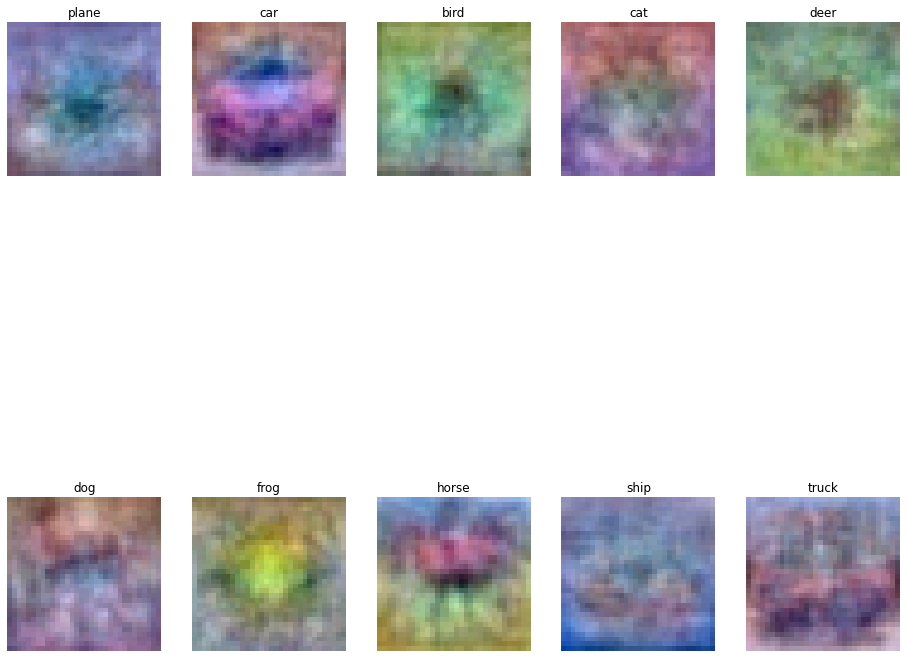

In [20]:
# These visualizations will only somewhat make sense if your learning rate and weight_decay parameters were
# properly chosen in the model. Do your best.

w = weights[:, :-1]
w = w.reshape(10, 3, 32, 32).transpose(0, 2, 3, 1)

w_min, w_max = np.min(w), np.max(w)

fig = plt.figure(figsize=(16, 16))
classes = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
for i in range(10):
    fig.add_subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[i, :, :, :].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype(int))
    plt.axis("off")
    plt.title(classes[i])
plt.show()


In [21]:
accuracies_test = [acc_reg_dict[w][2][-1] for w in weight_decays]
accuracies_test

[0.336, 0.336, 0.336, 0.336, 0.336]

#### Inline Question 3. (10%)

a. Compare and contrast the performance of the 2 classifiers i.e. Linear Regression and Logistic Regression.
b. Which classifier would you deploy for your multiclass classification project and why?


#### Your Answer:
a. Since here we tested our networks using only 1 layer, the performance of Linear and Logistic Regression is very similar. Also due to the shallow network, weight decay does not seem to have much of an effect. Performance wise, linear regression achieved an accuracy of 34.8% on the test set whereas Logistic regression achieved an accuracy of 33.6% and hence they are very similar to each other in performance. Although logistic regression is more intuitive than linear regression since it is able to produce confidence scores for each class which can be used to decide the predicted class whereas during Linear Regression, we are doing Binary classification for all the classes. 

b. For a multiclass classification project, I would tend to use Logistic Regression with densely connected layers rather than having just one layer